# **Partie 1**

In [186]:
# Importation des packages
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [238]:
#scikit learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [188]:
# Chargement du dataset 
df = pd.read_excel("Insurance-data.xlsx")

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [190]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
995,39,female,23.275,3,no,northeast,7986.47525
996,39,female,34.100,3,no,southwest,7418.52200
997,63,female,36.850,0,no,southeast,13887.96850
998,33,female,36.290,3,no,northeast,6551.75010


## **a.** Faisons une première description pour présenter les caractéristiques de la dataset.

Le dataset mis à notre disposition est un jeu de données de 1000 lignes et 7 colonnes. 

Il présente 7 variables dont une dépendante (Les frais médicaux individuels facturés par l'assurance maladie (charges)) qui consistue la cible à prédire et est quantitative.
    
Parmi les 6 variables indépendantes, nous avons :
   - 3 variables quantitatives (numériques) que sont : l'âge (age), l'indice de masse corporelle (bmi) et le nombre d'enfants couverts par l'assurance/nombre de personnes à charge (children); et
   - 3 variables qualitatives (catégorielles) que sont : le sexe de l'assureur (sex), le statut de l'assuré, fumeur ou non (smoker) et la zone résidentielle du bénéficaire (region). 

Les différents types sont répartis comme suit :
   - int64 <- (age, children)
   - float64 <- (bmi, charges)
   - string <- (sex, smoker, region)
   Parmi les variables catégorielles, 'sex' et 'smoker' sont binaires et 'region' est multiclasse.
        
   La variable à prédire (charges) étant quantitative, le travail de prédiction à faire sera un travail de régression.

## **b**. Analyse descriptive des données

### **•** Analyse descriptive univariée des variables quantitatives

Créons des fonctions pour obtenir les mesures de tendance centrale, de position et de dispersion ainsi que l'histogramme et le boxplot de chaque variable.

In [191]:
# Fonction pour obtenir les mesures de tendance centrale

def tend_centrale(column, df):
    col = df[column]

    moy = col.mean()
    mediane = col.median()
    mode = col.mode()

    print("\nMoyenne: ", moy, "\nMédiane: ", mediane, "\nMode: ", mode)


# Fonction pour obtenir les mesures de position

def position(column, df):
    col = df[column]

    min = col.min()
    max = col.max()

    print("\nMinimum: ", min, "\nMaximum: ", max)


# Fonction pour obtenir les mesures de dispersion

def dispersion(column, df):
    col = df[column]

    std = col.std()
    var = col.var()
    coef_var = var/col.mean()
    first_quart = col.quantile(0.25)
    sec_quart = col.quantile(0.50)
    third_quart = col.quantile(0.75)
    IQR = third_quart - first_quart

    print("\nEcart-type: ", std, "\nCoefficient de variation: ", coef_var, "\n1er quartile: ", first_quart, "\n2ème quartile: ", sec_quart, "\n3ème quartile: ", third_quart, "\nIntervalle inter-quartile: ", IQR)



# Fonction pour les graphiques

def graph(column, df):
    col = df[column]

    plt.figure(figsize = (12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(col, color='Blue', alpha=0.7)
    plt.xlabel(column.capitalize())
    plt.ylabel("Fréquences")
    plt.title("Histogramm on " + column)

    plt.subplot(1, 2, 2)
    sns.boxplot(col)
    plt.ylabel(column.capitalize())
    plt.title("Boxplot on " + column)

    plt.show()


**1.** 'age'

In [192]:
tend_centrale("age", df)
position("age", df)
dispersion("age", df)


Moyenne:  39.64 
Médiane:  40.0 
Mode:  0    19
Name: age, dtype: int64

Minimum:  18 
Maximum:  64

Ecart-type:  14.169586344603616 
Coefficient de variation:  5.065014560473695 
1er quartile:  27.0 
2ème quartile:  40.0 
3ème quartile:  52.0 
Intervalle inter-quartile:  25.0


**Interprétation**

_Tendance centrale_

+ La moyenne de l'age est 39,64 ce qui signifie que l'age moyen des assurés (principaux bénéficiaires) est de 40 ans.

+ Le mode est de 19, ce qui signifie que l'age le plus fréquent chez les assurés est 19 ans.

+ La médiane est de 40, ce qui signifie que la moitié des assurés a un age inférieur à 40, et l'autre moitié a un age supérieur à 40.

_Position_

+ Le minimum est de 18, donc le plus jeune assuré dont les informations sont dans ce datset, a 18 ans.

+ Le maximum est de 64, donc l'assuré le plus agé,dont les informations sont dans ce datset, a 64 ans.

+ Les valeurs de la colonne 'age' de ce dataset sont donc comprises entre 18 et 64.

_Dispersion_

+ L'écart-type est de 14,169 ce qui signifie que la plupart des assurés ont un age qui se situe dans un intervalle de + ou - 14ans autour de la moyenne, le dit intervalle étant [26ans, 54ans].

+ Le coefficient de variation est de 5,05 ce qui indique que les ages varient vraiment énormément par rapport à la moyenne.

+ Le premier quartile est de 27, ce qui signifie que 25% des assurés ont un age inférieur ou égal à 27ans.

+ Le deuxième quartile est de 40 et correspond à la médiane.

+ Le troisième quartile est de 52, ce qui signifie que 75% des assurés ont un age supérieur ou égal à 52ans.

+ L'intervalle inter-quartile est de 25, ce qui indique que les valeurs centrales des ages sont dispersées sur une plage de 25 ans; elles ne sont donc pas concentrées autour de la médiane.


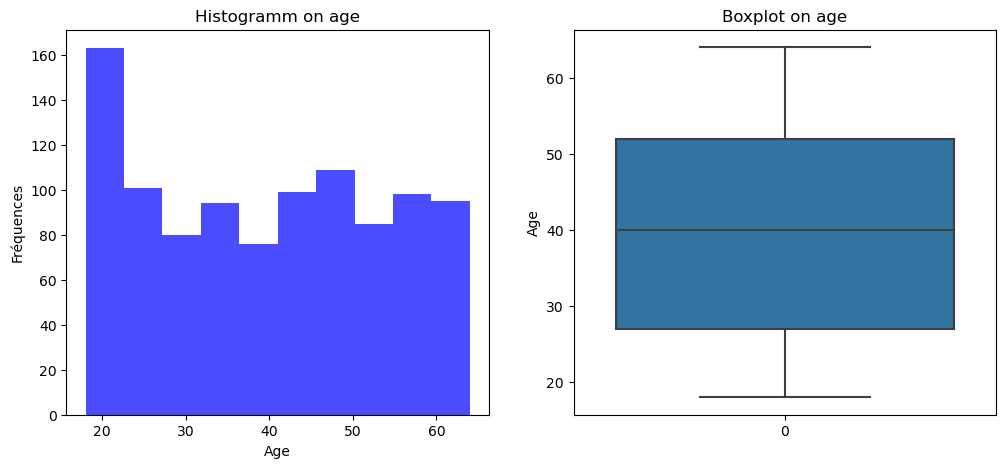

In [193]:
graph(column="age", df=df)

**Interprétation**

+ Au niveau de l'histogramme, on remarque au début un pic atteignant 165, alors que le reste de la distribution est sensiblement uniforme. On déduit donc que la distribution est asymétrique. 
Ce pic révèle que les assurés entre 18 et 22ans environ sont les plus fréquents tandis que ceux des autres tranches d'âges varient entre 70 et 110. 

+ Le boxplot, quant à lui, nous révèle l'absence d'outliers. On note également que les valeurs sont dispersés entre 18 et 64 ans.

**2.** 'bmi'

In [194]:
tend_centrale("bmi", df)
position("bmi", df)
dispersion("bmi", df)


Moyenne:  30.865565000000004 
Médiane:  30.59 
Mode:  0    32.3
Name: bmi, dtype: float64

Minimum:  15.96 
Maximum:  50.38

Ecart-type:  6.046396258391316 
Coefficient de variation:  1.1844561314036692 
1er quartile:  26.6 
2ème quartile:  30.59 
3ème quartile:  35.1125 
Intervalle inter-quartile:  8.512499999999996


**Interprétation**

D'après nos recherches, si le bmi est inférieur à 18,5, on est probablement trop maigre; - Si le bmi se situe entre 25 et 30, on a probablement quelques kilos en trop (surpoids); - Si le bmi se situe entre 30 et 40, on est obèse; - A partir d'un bmi de 40, on parle d'obésité morbide.


_Tendance centrale_

+ La moyenne de l'indice de masse corporelle est 30,86 ce qui signifie que l'assuré moyen est en surpoids voire légèrement obèse.

+ Le mode est de 32,3, ce qui signifie que le bmi le plus fréquent au sein de cette population d'assurés, traduit une situation d'obésité.

+ La médiane est de 30,59 , donc la moitié des assurés a un indice de masse corporelle inférieur à 30,59 , et l'autre moitié a un indice de masse corporelle supérieur à 30,59. Ce qui signifie que plus de la moiti des assurés est au moins en surpoids ou carrément obèse pour la moitié d'entre eux.

_Position_

+ Le minimum est de 15.96. Donc on note que malgré la tendance générale au surpoids qu'on est en train d'observer, il y a quand même des assurés en sous-poids, et le plus maigre d'entre eux a un bmi de 15.96.

+ Le maximum est de 50.38, donc il y a également des assurés en obésité morbide, et celui qui l'est le plus parmi eux a un bmi de 50.38.

+ Les valeurs de la colonne 'bmi' de ce dataset sont donc comprises entre 15.96 et 50.38.

_Dispersion_

+ L'écart-type est de 6.05 ce qui signifie que la plupart des assurés ont un bmi qui se situe dans un intervalle de + ou - 6kg/m^2 autour de la moyenne, le dit intervalle étant [24.81, 36.91]. Ce qui montre également que la plupart d'entre eux sont soit en surpoids soit obèses.

+ Le coefficient de variation qui est de 1.18  indique le bmi varie assez au sein de la population d'assurés de notre dataset.

+ Le premier quartile est de 26.6, ce qui indique que 25% des assurés ont un bmi inférieur ou égal à 26.6, ce qui signifie que moins du quart d'entre eux ne sont pas au minimum en surpoids.

+ Le deuxième quartile est de 30.59 et correspond à la médiane.

+ Le troisième quartile est de 35.11, ce qui signifie que 75% des assurés ont un age supérieur ou égal à 52ans.

+ L'intervalle inter-quartile est de 8.51, ce qui indique que les valeurs centrales du bmi s'étend sur une plage d'environ 8kg/m^2; elles sont donc assez concentrées autour de la médiane.


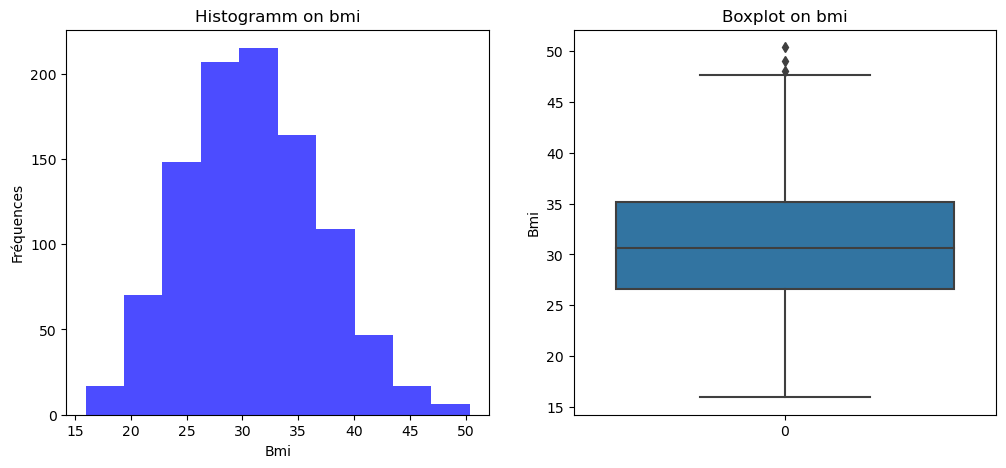

In [195]:
graph(column="bmi", df=df)

**Interprétation**

+ Au niveau de l'histogramme, on remarque que les données ont globalement une forme de cloche, quoique légèrement asymétrique vers la droite. Elles suivent donc probablement une distribution assez proche d'une distribution normale.

+ Le boxplot, quant à lui, nous révèle la présence de valeurs extrêmes entre 47 et 52. Toutefois, étant donnée que le bmi peut atteindre de telles valeurs, auquel cas on est dans de l'obésité, ces valeurs ne sont donc pas abérrantes. On note également que les valeurs sont très concentrées autour de la médiane.

**3.** 'children'

In [196]:
tend_centrale("children", df)
position("children", df)
dispersion("children", df)


Moyenne:  1.08 
Médiane:  1.0 
Mode:  0    0
Name: children, dtype: int64

Minimum:  0 
Maximum:  5

Ecart-type:  1.1987647963787706 
Coefficient de variation:  1.330589849108366 
1er quartile:  0.0 
2ème quartile:  1.0 
3ème quartile:  2.0 
Intervalle inter-quartile:  2.0


**Interprétation**

_Tendance centrale_

+ La moyenne est de 1.08 ce qui indique que les assurés ont en moyenne un enfant couvert par l'assurance maladie ou une personne à charge.

+ Le mode est de 0, ce qui indique que les assurés n'ayant pas d'enfants ou de personnes à charge couverts par l'assurance sont plus fréquents.

+ La médiane est de 1, ce qui indique que la moitié des assurés n'ont pas d'enfants ou de personnes à charge couverts par l'assurance et que l'autre moitié ont entre un et cinq enfants ou personnes à charge que l'assurance couvre.

_Position_

+ Le minimum est de 0, ce qui indique qu'il y a des individus dont l'assurance est uniquement pour eux-même.

+ Le maximum est de 5, ce qui indique qu'il y a des individus dont l'assurance couvre jusqu'à 5 enfants ou personnes.

+ Le nombre d'enfants/personnes à charge couverts par l'assurance varie donc de 0 et 5, avec une majorité de 0.

_Dispersion_

+ L'écart-type est de 1.19 donc ce qui montre que la plupart des individus ont entre 0 et 2 enfants/personnes à charges couverts par l'assurance.

+ Le coefficient de variation est de 1.33, ce qui montre que le nombre d'enfants/personnes à charges varie assez par rapport à la moyenne.

+ Le premier quartile est de 0, ce qui montre que 25% des individus n'ont pas d'enfants/personnes à charges couverts par l'assurance.

+ Le deuxième quartile est de 1 et correspond à la médiane.

+ Le troisième quartile est de 2, ce qui signifie que 75% des assurés ont au moins 2 d'enfants/personnes à charges couverts par l'assurance.

+ L'intervalle inter-quartile est de 25


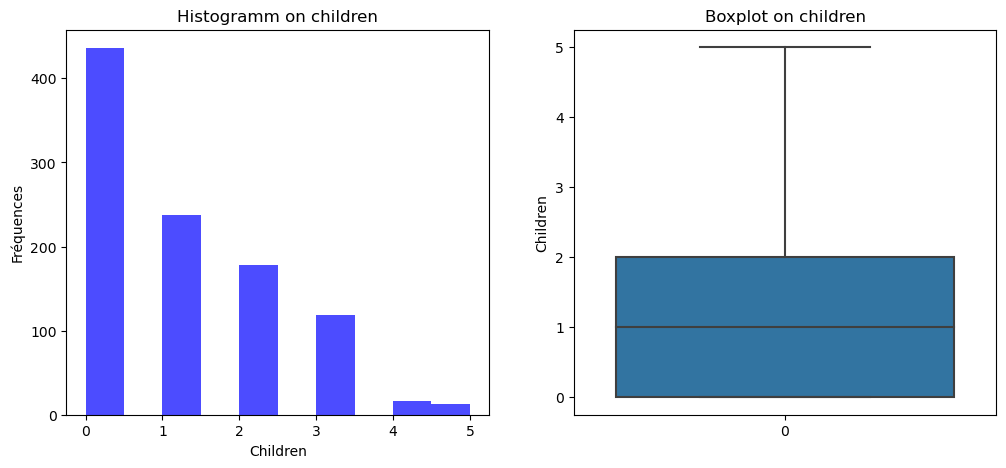

In [197]:
graph(column="children", df=df)

**Interprétation**

+ Au niveau de l'histogramme, on remarque au début un pic atteignant 165, alors que le reste de la distribution est sensiblement uniforme. On déduit donc que la distribution est asymétrique. 
Ce pic révèle que les assurés entre 18 et 22ans environ sont les plus fréquents tandis que ceux des autres tranches d'âges varient entre 70 et 110. 

+ Le boxplot, quant à lui, nous révèle l'absence d'outliers. On note également que les valeurs sont dispersés entre 18 et 64 ans.

**4.** 'charges'

In [198]:
tend_centrale("charges", df)
position("charges", df)
dispersion("charges", df)


Moyenne:  13099.629425448999 
Médiane:  9286.85075 
Mode:  0    1639.5631
Name: charges, dtype: float64

Minimum:  1121.8739 
Maximum:  63770.42801

Ecart-type:  11994.129978320429 
Coefficient de variation:  10981.925462514673 
1er quartile:  4719.683424999999 
2ème quartile:  9286.85075 
3ème quartile:  16073.0954375 
Intervalle inter-quartile:  11353.4120125


**Interprétation**

_Tendance centrale_

+ La moyenne de l'age est 39,64 ce qui signifie que l'age moyen des assurés (principaux bénéficiaires) est de 40 ans.

+ Le mode est de 19, ce qui signifie que l'age le plus fréquent chez les assurés est 19 ans.

+ La médiane est de 40, ce qui signifie que la moitié des assurés ont un age inférieur à 40, et l'autre moitié ont un age supérieur à 40.

_Position_

+ Le minimum est de 18, donc le plus jeune assuré dont les informations sont dans ce datset, a 18 ans.

+ Le maximum est de 64, donc l'assuré le plus agé,dont les informations sont dans ce datset, a 64 ans.

+ Les valeurs de la colonne 'age' de ce dataset sont donc comprises entre 18 et 64.

_Dispersion_

+ L'écart-type est de 14,169 ce qui signifie que la plupart des assurés ont un age qui se situe dans un intervalle de + ou - 14ans autour de la moyenne, le dit intervalle étant [26ans, 54ans].

+ La variance est de 200,777 ce qui signifie que les ages sont très dispersées autour de la moyenne(40ans).

+ Le premier quartile est de 27, ce qui signifie que 25% des assurés ont un age inférieur ou égal à 27ans.

+ Le deuxième quartile est de 40 et correspond à la médiane.

+ Le troisième quartile est de 52, ce qui signifie que 75% des assurés ont un age supérieur ou égal à 52ans.

+ L'intervalle inter-quartile est de 25


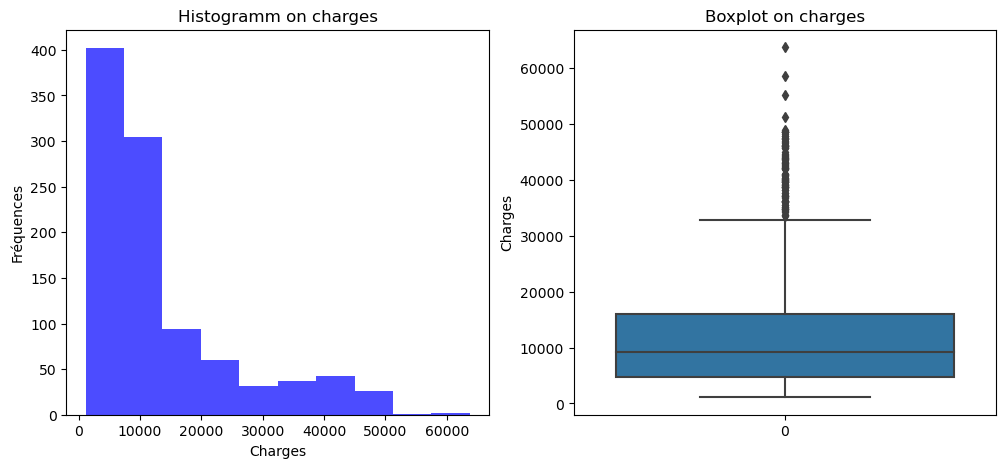

In [199]:
graph(column="charges", df=df)

**Interprétation**

+ Au niveau de l'histogramme, on note que 

+ Le boxplot, quant à lui, nous révèle l'absence d'outliers. On note également que les valeurs sont dispersés entre 18 et 64 ans.

### **•** Analyse descriptive univariée des variables qualitatives

In [200]:
def description(column, df):
    col = df[column]

    frequences = col.value_counts()
    pourcentages = (frequences/len(col))*100

    print("Fréquences:\n", frequences, "\nPourcentages:\n", pourcentages)


def cat_graph(column, df):
    col = df[column]
    plt.figure()
    col.value_counts().plot(kind="bar")
    plt.xlabel("Catégories")
    plt.ylabel("\nFréquences")
    plt.title("Distribution de " + column)
    plt.show()

**1.** 'sex'

In [201]:
description("sex", df)

Fréquences:
 male      505
female    495
Name: sex, dtype: int64 
Pourcentages:
 male      50.5
female    49.5
Name: sex, dtype: float64


**Interprétation**
+ On note qu'il y a deux catégories : male et female. 
+ On note également qu'il y a légèrement plus d'hommes (un peu plus de la moitié) que de femmes.

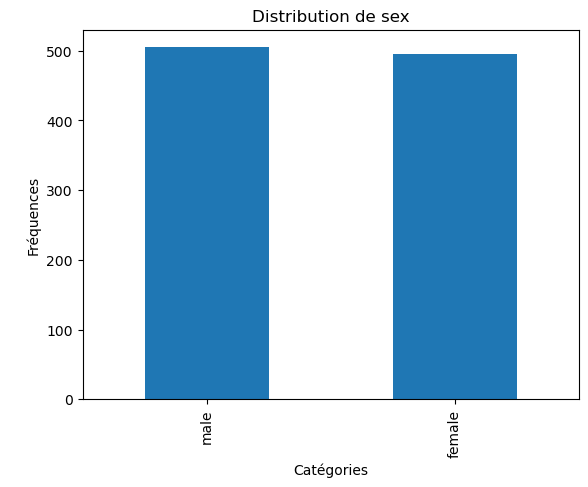

In [202]:
cat_graph('sex', df)

Ce graphique permet de confirmer qu'il y a effectivement un peu plus d'hommes que de femmes.

**2.** 'smoker'

Fréquences:
 no     803
yes    197
Name: smoker, dtype: int64 
Pourcentages:
 no     80.3
yes    19.7
Name: smoker, dtype: float64


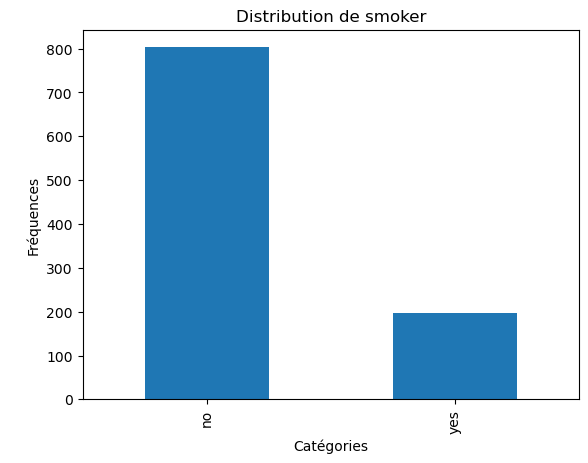

In [203]:
description("smoker", df)
cat_graph("smoker", df)

**Interpretation**
+ On note qu'on a deux catégories : no (pour non fumeur) et yes (pour fumeur).
+ On a largement plus de no (80,3%) que de yes (19,7%).

**3.** 'region'

Fréquences:
 southeast    278
northeast    247
southwest    244
northwest    231
Name: region, dtype: int64 
Pourcentages:
 southeast    27.8
northeast    24.7
southwest    24.4
northwest    23.1
Name: region, dtype: float64


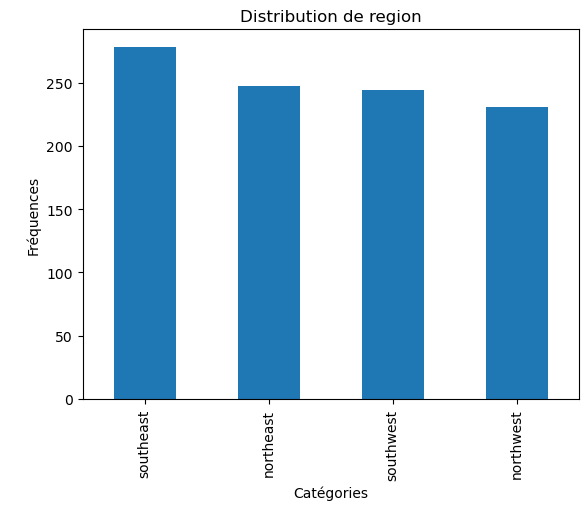

In [204]:
description("region", df)
cat_graph("region", df)

**Interprétation**
+ On note qu'il y a 4 catégories : northeast, southeast, southwest et northwest.
+ On remarque qu'il y a de manière générale, plus d'assurés à l'est qu'à l'ouest et au sud qu'au nord. Par rapport aux autres régions, on remarque qu'il ya plus d'assurés au sud-est(southeast).

### **•** Analyse descriptive bivariée entre la variable cible et les variables qualitatives

In [205]:
def bi_boxplot(column):
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df[column], y=df['charges'], palette='viridis')
    plt.title('Boxplot des charges par ' + column)
    plt.xlabel(column.capitalize())
    plt.ylabel('Charges')
    plt.show()

* ### Entre 'charges' et 'sex'

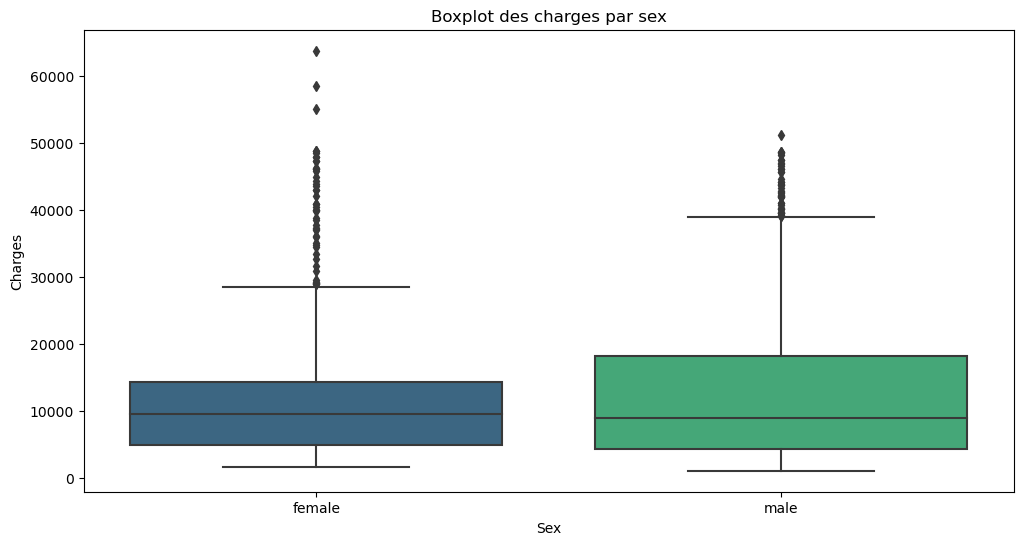

In [206]:
bi_boxplot("sex")

**Interprétation**

* ### Entre 'charges' et 'smoker'

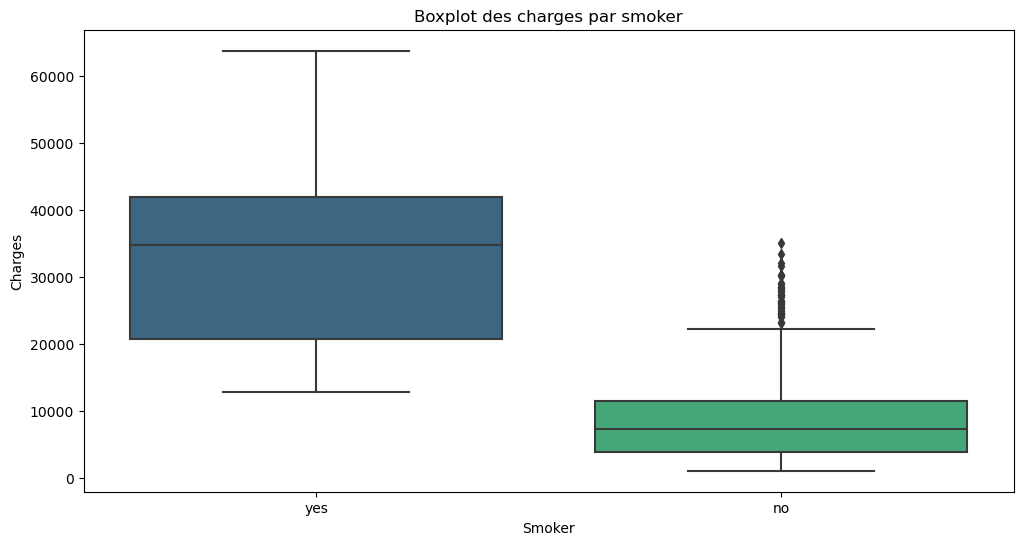

In [207]:
bi_boxplot("smoker")

**Interprétation**

* ### Entre 'charges' et 'region'

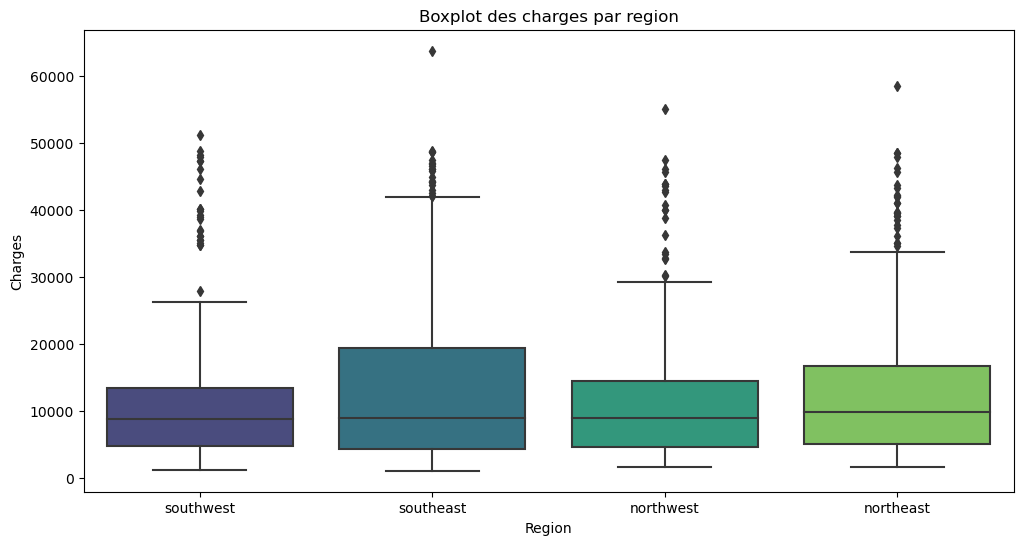

In [208]:
bi_boxplot("region")

**Interprétation**

### **•** Analyse descriptive bivariée entre la variable cible et les variables qualitatives

In [209]:
def scat(column):
    x = df[column]
    y = df['charges']

    plt.figure(figsize=(10, 6))

    scatter = plt.scatter(x, y, c=df['age'], s=75, alpha=0.5, cmap='viridis')

    plt.xlabel('\n'+column.capitalize(), fontsize=12)
    plt.ylabel('Charges\n', fontsize=12)
    plt.title('Scatter\n', fontsize=16)

    plt.colorbar(scatter)

    plt.show()

* ### Entre 'charges' et 'age'

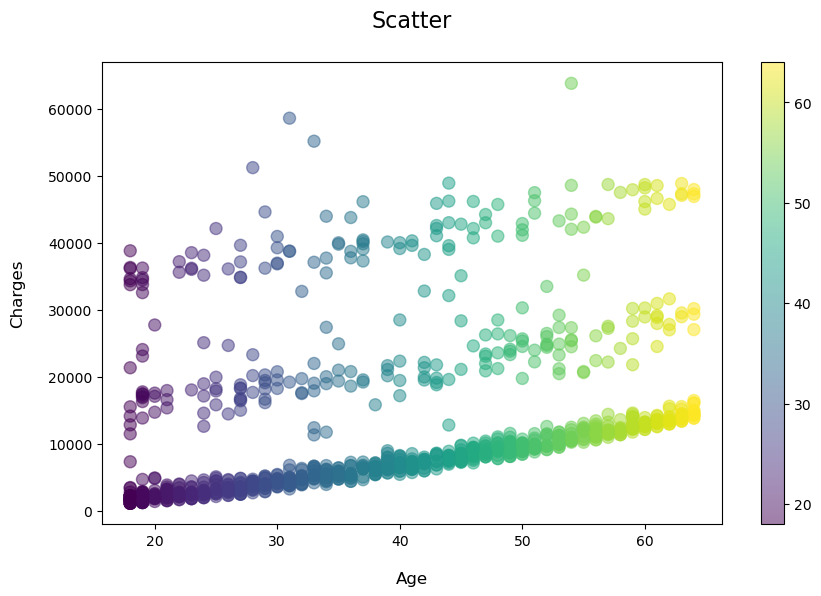

In [210]:
scat('age')

**Interprétation**

* ### Entre 'charges' et 'bmi'

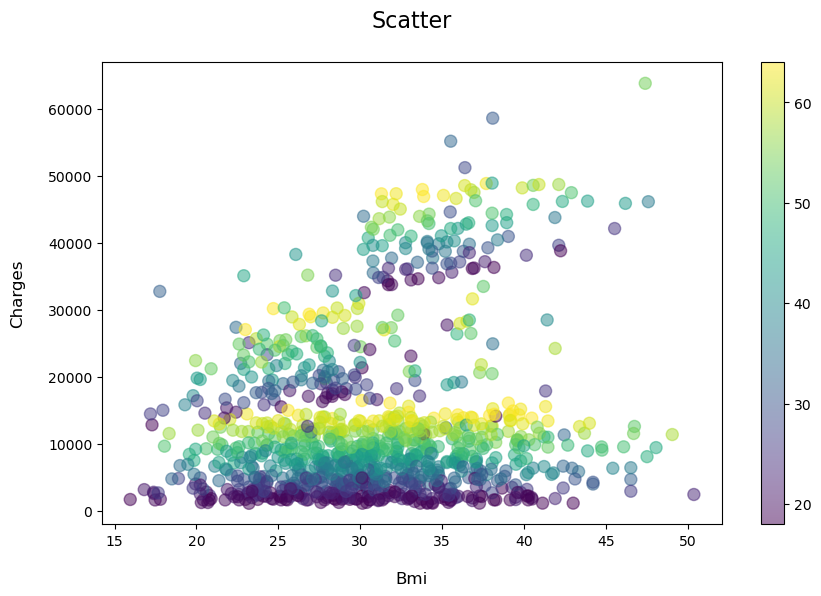

In [211]:
scat('bmi')

**Interpretation**

* ### Entre 'charges' et 'children'

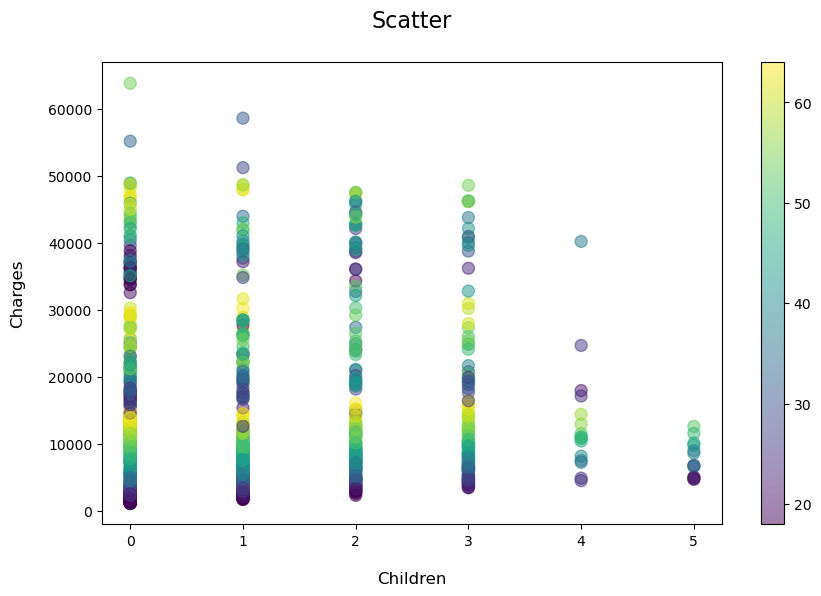

In [212]:
scat('children')

**Interprétation**

### **•** Matrice de corrélation

C:\Users\Sadi\AppData\Local\Temp\ipykernel_8392\3836466883.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice = df.corr()


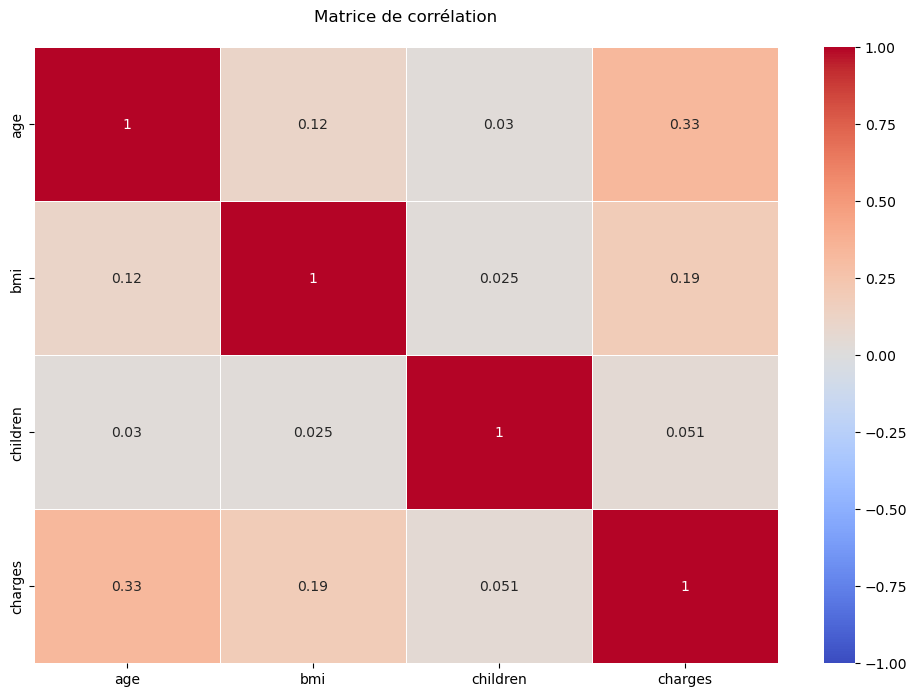

In [213]:
matrice = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(matrice, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.4)
plt.title("Matrice de corrélation\n")
plt.show()

**Interpretation**


### **•** Interprétation de l’ensemble des résultats issus de l’analyse descriptive.

## **c**. Pré-traitement des données

In [214]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### • Convertissons et recodons les modalités des variables qualitatives au format approprié pour la modélisation

In [215]:
# Recodons les modalités de la variable 'region'
def recode_region(region):
    if region in ['northwest', 'southwest']:
        return 'West'
    else:
        return 'East'

df['region'] = df['region'].apply(recode_region)

In [216]:
# Transformons les variables catégorielles en variables numériques
encoder = OneHotEncoder()

cat_var = ['sex', 'smoker', 'region']
for elt in cat_var:
    df[elt] = encoder.fit_transform(df[elt].values.reshape(-1, 1)).toarray()




In [217]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,0.0,16884.92400
1,18,0.0,33.770,1,1.0,1.0,1725.55230
2,28,0.0,33.000,3,1.0,1.0,4449.46200
3,33,0.0,22.705,0,1.0,0.0,21984.47061
4,32,0.0,28.880,0,1.0,0.0,3866.85520
...,...,...,...,...,...,...,...
995,39,1.0,23.275,3,1.0,1.0,7986.47525
996,39,1.0,34.100,3,1.0,0.0,7418.52200
997,63,1.0,36.850,0,1.0,1.0,13887.96850
998,33,1.0,36.290,3,1.0,1.0,6551.75010


In [218]:
# Mettons toutes les variables quantitatives à la meme échelle
scaler = StandardScaler()

var_a_standardiser = ['sex', 'smoker', 'region', 'age', 'bmi', 'children']
df[var_a_standardiser] = scaler.fit_transform(df[var_a_standardiser])

In [219]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.457370,-1.051315,-0.490714,-0.901378,-2.018946,2.018946,16884.92400
1,-1.527979,0.951190,0.480598,-0.066769,0.495308,-0.495308,1725.55230
2,-0.821889,0.951190,0.353186,1.602450,0.495308,-0.495308,4449.46200
3,-0.468844,-1.051315,-1.350333,-0.901378,0.495308,-0.495308,21984.47061
4,-0.539453,-1.051315,-0.328552,-0.901378,0.495308,-0.495308,3866.85520
...,...,...,...,...,...,...,...
995,-0.045190,0.951190,-1.256015,1.602450,0.495308,-0.495308,7986.47525
996,-0.045190,-1.051315,0.535204,1.602450,0.495308,-0.495308,7418.52200
997,1.649426,0.951190,0.990248,-0.901378,0.495308,-0.495308,13887.96850
998,-0.468844,0.951190,0.897584,1.602450,0.495308,-0.495308,6551.75010


### • Divisons la base de données en échantillon d’apprentissage (80%) et en échantillon test (20%)

In [220]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)

### • Séparons la variable cible des variables explicatives.

In [221]:

x_train  = data_train.drop(columns=['charges'])
y_train = data_train['charges']

x_test  = data_test.drop(columns=['charges'])
y_test = data_test['charges']


## **d**. Construisons un premier modèle basé sur l’algorithme de knn

### • Construisons un premier modèle M0 à partir des paramètres par défaut de l’algorithme

In [222]:
# Créons le modèle
knn_m0 = KNeighborsRegressor()

# Entrainons-le sur l'ensemble d'entrainement
knn_m0.fit(x_train, y_train) 

KNeighborsRegressor()

### • Modifions le paramètre K pour construire trois autres modèles M1, M2 et M3, respectivement pour K=3, K=7 et K=10

In [223]:
# Modèle M1 avec K=3
knn_m1 = KNeighborsRegressor(n_neighbors=3)
knn_m1.fit(x_train, y_train)

# Modèle M2 avec K=7
knn_m2 = KNeighborsRegressor(n_neighbors=7)
knn_m2.fit(x_train, y_train)

# Modèle M3 avec K=10
knn_m3 = KNeighborsRegressor(n_neighbors=10)
knn_m3.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

### • Evaluons les performances de chacun de ces modèles

In [224]:
# Calculons l'erreur quadratique moyenne et le coefficient de détermination de chaque modèle pour évaluer les performances

# Modèle m0
y_pred_m0 = knn_m0.predict(x_test)
mse_m0 = mean_squared_error(y_test, y_pred_m0)
r2s_0 = r2_score(y_test, y_pred_m0)

# Modèle m1
y_pred_m1 = knn_m1.predict(x_test)
mse_m1 = mean_squared_error(y_test, y_pred_m1)
r2s_1 = r2_score(y_test, y_pred_m1)

# Modèle m2
y_pred_m2 = knn_m2.predict(x_test)
mse_m2 = mean_squared_error(y_test, y_pred_m2)
r2s_2 = r2_score(y_test, y_pred_m2)

# Modèle m3
y_pred_m3 = knn_m3.predict(x_test)
mse_m3 = mean_squared_error(y_test, y_pred_m3)
r2s_3 = r2_score(y_test, y_pred_m3)

performances = pd.DataFrame({
    'Modèles': ['M0 (par défaut)', 'M1', 'M2', 'M3'],
    'Neighboors': [5, 3, 7, 10],
    'MSE': [mse_m0, mse_m1, mse_m2, mse_m3],
    'R2 Score': [r2s_0, r2s_1, r2s_2, r2s_3]
})

performances

,Modèles,Neighboors,MSE,R2 Score
0,M0 (par défaut),5,2.875564e+07,0.852762
1,M1,3,2.859367e+07,0.853591
2,M2,7,2.926098e+07,0.850174
3,M3,10,2.740209e+07,0.859693


### • Interprétons les résultats 

Le modèle le plus performant est celui avec K=10 (M3).

## **e**. Optimisons le modèle pour K=10

### • Optimisons les hyperparamètres weights, p et algorithm

In [225]:
# Hyperparamètres actuels du modèle M3, tous par défauts à l'exception de n_neighbors (K=10)

knn_m3.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

Donc on a comme hyperparamètres actuels :
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [226]:
# Définissons une fonction d'optimisation des hyperparamètres

def optimize_param(x_train, y_train):
    
    knn = KNeighborsRegressor(n_neighbors=10)

    param = {'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


    grid_search = GridSearchCV(knn, param, cv = 5, scoring = 'r2')

    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    best_param = grid_search.best_params_
    best_score = grid_search.best_score_

   
    return best_model, best_param, best_score
    
best_knn, best_params, best_r2 = optimize_param(x_train, y_train)
best_knn.get_params(), best_r2 

({'algorithm': 'brute',
  'leaf_size': 30,
  'metric': 'minkowski',
  'metric_params': None,
  'n_jobs': None,
  'n_neighbors': 10,
  'p': 2,
  'weights': 'distance'},
 0.8156698208864304)

### • Evaluons les performances du modèle utilisé

In [227]:
y_pred_op = best_knn.predict(x_test)
mse_op = mean_squared_error(y_test, y_pred_op)
r2s_op = r2_score(y_test, y_pred_op) 

print("Performances du modèle optimisé\n", "\nMSE: ", mse_op, "\R2 score: ", r2s_op)

Performances du modèle optimisé
 
MSE:  26683728.438197374 \R2 score:  0.8633708210809945


### • Comparons nos résultats au modèle par défaut

Les performances de ce modèle optimisé (MSE: 26683728.438197374, R2 score: 0.8633708210809945) sont clairement meilleures que celles du modèle par défaut M0 (MSE: 2.875564e+07, R2 score: 0.852762) 	

### • Faisons le choix du modèle optimal

Le modèle optimal est donc le modèle de régression KNN avec les hyperparamètres suivants :
    {'algorithm': 'brute',
    'leaf_size': 30,
    'metric': 'minkowski',
    'metric_params': None,
    'n_jobs': None,
    'n_neighbors': 10,
    'p': 2,
    'weights': 'distance'}


## **f**. Analysons le meilleur modèle

### • Représentons un nuage de points qui nous permet de visualiser la relation entre les valeurs réelles et les valeurs prédites

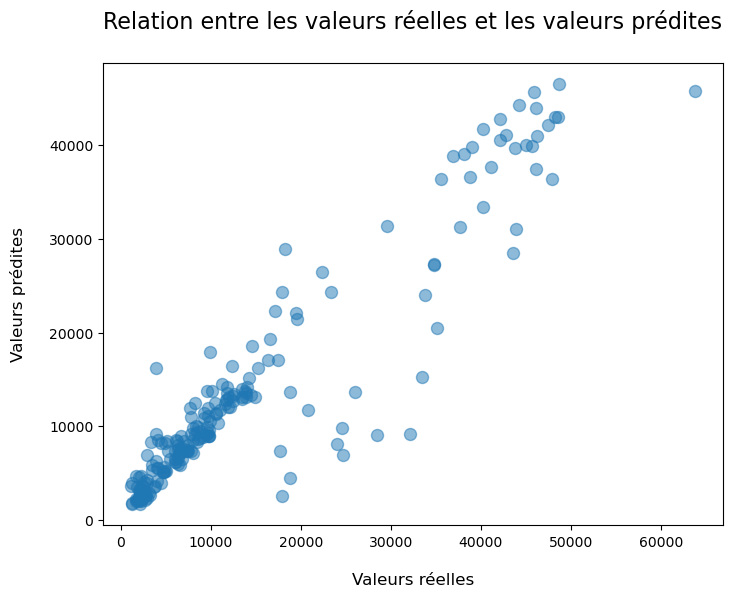

In [228]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(x = y_test, y = y_pred_op, s=75, alpha=0.5)

plt.xlabel('\nValeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites\n', fontsize=12)
plt.title('Relation entre les valeurs réelles et les valeurs prédites\n', fontsize=16)

plt.show() 

### • Faisons une analyse des résidus issus du meilleur modèle: nuage de points entre les valeurs prédites et les résidus issus du modèle

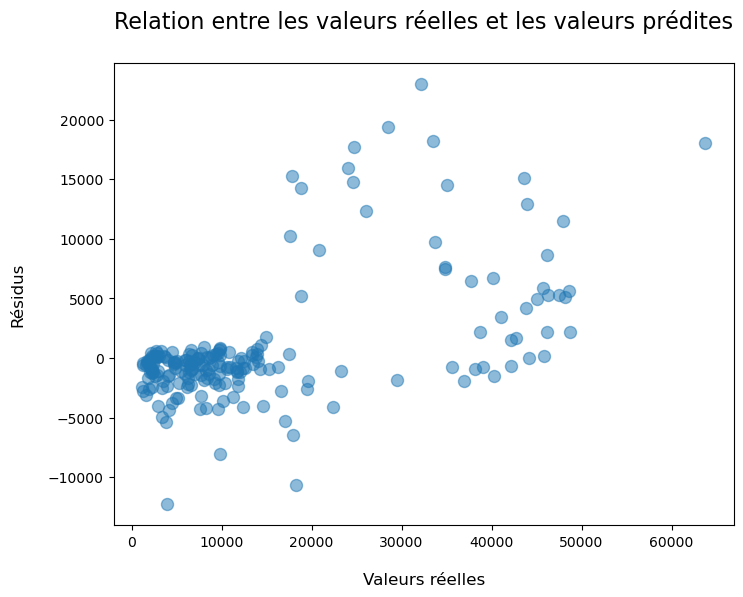

In [229]:
residus = y_test - y_pred_op 

plt.figure(figsize=(8, 6))

scatter = plt.scatter(x = y_test, y = residus, s=75, alpha=0.5)

plt.xlabel('\nValeurs réelles', fontsize=12)
plt.ylabel('Résidus\n', fontsize=12)
plt.title('Relation entre les valeurs réelles et les valeurs prédites\n', fontsize=16)

plt.show()

### • Interprétons les résultats

**Valeurs réelles ~ Valeurs prédites**

Du scatter portant sur la relation entre les valeurs réelles et les valeurs prédites, on constate que les points situent globalement le long de la ligne y=x, bien qu'ils soient un peu dispersés entre 18000 et 45000. 
Cela signifie que les valeurs prédites sont globalement assez proches des valeurs réelles. On peut donc conclure que le modèle est d'une performance acceptable.

**Valeurs réelles ~ Résidus**

On constate ici que, plus les valeurs de la variable cible augmente, plus les résidus augmentent également. Ces derniers sont assez dispersés.
Cela montre que le modèle a plus de mal à faire de bonnes prédictions, et donc est moins performant, sur les grandes valeurs que sur les petites, ce qui correspond à un problème d'hétéroscédasticité.


## **g**. Faisons une synthèse générale de l’étude

### • Commentons l'ensemble des résultats

+ L'analyse descriptive a révélé des tendances générales dans les données, ainsi que des valeurs extrêmes qui ne se révélées ne pas être des outliers.

+ Le recodage des modalités de la variable 'region' a permis de réduire le nombre de catégorie de celle-ci. 

+ Le modèle par défaut s'est révélé plus performant. Après optimisation de tous les autres hyperparamètres également, seul l'hyperparamètre 'algorithme' a changé, mais la performance du modèle s'est encore plus améliorée, comme le montrent le R2 score (0.8633708210809945) et le MSE (2.875564e+07).

+ L'analyse des relations entre valeurs réelles et prédites, ainsi qu'entre valeurs réelles et résidus, a mis en évidence une tendance à l'hétéroscédasticité, indiquant des erreurs de prédiction plus grandes pour les grandes valeurs de la variable cible.

### • Tirons une conclusion

        Le modèle optimisé présente une performance satisfaisante dans la prédiction des valeurs de la variable cible, avec un R2 score élevé indiquant une bonne capacité à expliquer la variabilité des données.
         Toutefois, la présence d'hétéroscédasticité et de prédictions pas toujours précises ou exactes suggèrent qu'on pourrait encore l'améliorer.

### • Proposons des solutions

+ Pour améliorer la précision du modèle, on pourrait collecter des données supplémentaires, éliminer les caractéristiques les moins pertinentes ou en créer de nouvelles qui apportent de nouvelles informations.

+ Pour réduire l'hétéroscédasticité pour améliorer les performances, on peut ajouter des variables explicatives qui pourraient aider le modèle à mieux comprendre la variabilité des données dans les catégories de données de la variable cible discrimées. On peut également effectuer des transformations comme la transformation logarthmique sur les données pour réduire voire résoudre ce problème.

## **h**. Utilisons le modèle optimal pour prédire sur la nouvelle vague de clients voulant souscrire à une assurance maladie dans la compagnie X.

In [230]:
predict_df = pd.read_excel("Predict_data.xlsx")
predict_df

,age,sex,bmi,children,smoker,region,a
0,36,female,26.885,0,no,northwest,NaN
1,30,male,22.990,2,yes,northwest,NaN
2,24,male,32.700,0,yes,southwest,NaN
3,24,male,25.800,0,no,southwest,NaN
4,48,male,29.600,0,no,southwest,NaN
...,...,...,...,...,...,...,...
333,52,female,44.700,3,no,southwest,NaN
334,50,male,30.970,3,no,northwest,NaN
335,18,female,31.920,0,no,northeast,NaN
336,18,female,36.850,0,no,southeast,NaN


In [231]:
predict_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'a '], dtype='object')

Il y a une colonne intruse donc on va la supprimer.

In [232]:
predict_df = predict_df.drop(["a "], axis=1)
predict_df 

,age,sex,bmi,children,smoker,region
0,36,female,26.885,0,no,northwest
1,30,male,22.990,2,yes,northwest
2,24,male,32.700,0,yes,southwest
3,24,male,25.800,0,no,southwest
4,48,male,29.600,0,no,southwest
...,...,...,...,...,...,...
333,52,female,44.700,3,no,southwest
334,50,male,30.970,3,no,northwest
335,18,female,31.920,0,no,northeast
336,18,female,36.850,0,no,southeast


**Appliquons les mêmes modifications sur ces nouvelles données que sur celles d'entrainement et de test.**

In [233]:
# Convertissons et recodons les modalités des variables qualitatives au format approprié pour la modélisation

# Recodons les modalités de la variable 'region'

def recode_region(region):
    if region in ['northwest', 'southwest']:
        return 'West'
    else:
        return 'East'

predict_df['region'] = predict_df['region'].apply(recode_region)


# Transformons les variables catégorielles en variables numériques
encoder = LabelEncoder()

cat_var = ['sex', 'smoker', 'region']
for elt in cat_var:
    predict_df[elt] = encoder.fit_transform(predict_df[elt])



# Mettons toutes les variables quantitatives à la meme échelle
scaler = StandardScaler()

var_a_standardiser = ['sex', 'smoker', 'region', 'age', 'bmi', 'children']
predict_df[var_a_standardiser] = scaler.fit_transform(predict_df[var_a_standardiser])

predict_df

,age,sex,bmi,children,smoker,region
0,-0.141518,-1.011905,-0.512093,-0.930525,-0.543157,0.965105
1,-0.582375,0.988235,-1.139274,0.703332,1.841089,0.965105
2,-1.023231,0.988235,0.424250,-0.930525,1.841089,0.965105
3,-1.023231,0.988235,-0.686802,-0.930525,-0.543157,0.965105
4,0.740196,0.988235,-0.074918,-0.930525,-0.543157,0.965105
...,...,...,...,...,...,...
333,1.034101,-1.011905,2.356514,1.520260,-0.543157,0.965105
334,0.887148,0.988235,0.145682,1.520260,-0.543157,0.965105
335,-1.464088,-1.011905,0.298653,-0.930525,-0.543157,-1.036156
336,-1.464088,-1.011905,1.092491,-0.930525,-0.543157,-1.036156


In [234]:
predictions = best_knn.predict(predict_df)

In [235]:
predictions = pd.DataFrame(predictions, columns=['Prédictions'])
predictions.to_excel("Prédictions.xlsx") 

# **Partie 2**

## Testons plusieurs autres modèles suivant un protocole expérimentale rigoureux

### **•** Choix des modèles

_ Suite à l'entrainement du modèle précédent avec l'algorithme KNN Regressor, nous avons constaté la présence d'hétéroscédasticité, c'est-à-dire que plus les valeurs augmentent, plus le modèle a du mal à faire de bonnes prédictions. Cela laisse penser que la relation entre les variables n'est pas linéaire, et que le modèle a du mal à capturer cette complexité. De ce fait, nous avons décidé de choisir par la suite des modèles qui peuvent capturer des relations complexes et non linéaires :

+ Le **Random Forest Regressor**, car c'est un modèle non linéaire qui peut capturer des relations complexes entre les variables.

+ Le **Extreme Gradient Boosting Regressor (XGBoost)**, c'est un modèle qui a d'excellentes performances en terme de précision, et qui peut gérer des relations non linéaires complexes.

+ **Le Support Vector Regression (SVR)**, car il peut capturer des relations non linéaires complexes à travers des noyaux.

### **Random Forest Regressor**

In [279]:
# Importation
from sklearn.ensemble import RandomForestRegressor 

# Initialisons le modèle
random_fr = RandomForestRegressor(random_state=42)

#### **•** Caractéristiques importantes

#### **•** Optimisation des hyperparamètres

In [281]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': 'r2'
}

grid_search = GridSearchCV(estimator=random_fr, param_grid=rf_param_grid, cv=5, scoring=scoring, refit='r2', verbose=1, n_jobs=-1) 

grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_ 
best_r2_rf = grid_search.best_score_

print("Meilleurs paramètres:\n ", best_params_rf, "\nMeilleur r2 score: ", best_r2_rf)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Meilleurs paramètres:
  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300} 
Meilleur r2 score:  0.8376588786025687


#### **•** Evaluons les performances de ce modèle

In [282]:
y_pred_rf = best_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Performances du modèle\n", "\nMSE: ", mse_rf, "\nR2 score: ", r2_rf)

Performances du modèle
 
MSE:  20479743.52111864 
R2 score:  0.8951371976280205


#### **•** Interprétons les résultats

+ Les performances du modèle KNeighborsRegressor optimisé sont :  MSE: 26683728.438197374, R2 score: 0.8633708210809945

+ Les performances de ce modèle RandomForestRegressor optimisé sont :  MSE: 20479743.52111864, R2 score: 0.8951371976280205

**Le meilleur modèle est donc le RandomForestRegressor optimisé.**

### **Extreme Gradient Boosting (XGBoost)**

In [283]:
# Importation
import xgboost as xgb 

# Initialisons le modèle
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

#### **•** Caractéristiques importantes

#### **•** Optimisation des hyperparamètres

In [284]:

xgb_param_grid = {
    'n_estimators': [90, 100, 110],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsamples': [0.7, 0.8, 0.9]
}

scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': 'r2'
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring=scoring, refit='r2', verbose=1, n_jobs=-1) 

grid_search.fit(x_train, y_train)

best_xgb = grid_search.best_estimator_
best_params_xgb = grid_search.best_params_ 
best_r2_xgb = grid_search.best_score_

print("Meilleurs paramètres:\n ", best_params_xgb, "\nMeilleur r2 score: ", best_r2_xgb)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs paramètres:
  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 90, 'subsamples': 0.7} 
Meilleur r2 score:  0.8340573833572341


C:\Users\Sadi\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [03:40:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "subsamples" } are not used.

  warnings.warn(smsg, UserWarning)


#### **•** Evaluons les performances de ce modèle

In [285]:
y_pred_xgb = best_xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Performances du modèle\n", "\nMSE: ", mse_xgb, "\nR2 score: ", r2_xgb)


Performances du modèle
 
MSE:  20539519.4617343 
R2 score:  0.8948311257946053


#### **•** Interprétons les résultats

+ Les performances du modèle KNeighborsRegressor optimisé sont :  MSE: 26683728.438197374, R2 score: 0.8633708210809945

+ Les performances du modèle RandomForestRegressor optimisé sont :  MSE: 20479743.52111864, R2 score: 0.8951371976280205

+ Les performances de ce modèle ExtremeGradientBoosting optimisé sont :  MSE: 20539519.4617343, R2 score: 0.8948311257946053

**Le meilleur modèle est donc toujours le RandomForestRegressor optimisé.**

### **Support Vector Regression (SVR)**

In [286]:
# Importation
from sklearn.svm import SVR
# Initialisons le modèle
svr = SVR()

#### **•** Caractéristiques importantes

#### **•** Optimisation des hyperparamètres

In [287]:

svr_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]
}

scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': 'r2'
}

grid_search = GridSearchCV(estimator=svr, param_grid=svr_param_grid, cv=5, scoring=scoring, refit='r2', verbose=1, n_jobs=-1) 

grid_search.fit(x_train, y_train)

best_svr = grid_search.best_estimator_
best_params_svr = grid_search.best_params_ 
best_r2_svr = grid_search.best_score_

print("Meilleurs paramètres:\n ", best_params_svr, "\nMeilleur r2 score: ", best_r2_svr)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


Meilleurs paramètres:
  {'C': 1000, 'epsilon': 0.01, 'kernel': 'poly'} 
Meilleur r2 score:  0.8132071857841938


#### **•** Evaluons les performances de ce modèle

In [288]:
y_pred_svr = best_svr.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Performances du modèle\n", "\nMSE: ", mse_svr, "\nR2 score: ", r2_svr)

Performances du modèle
 
MSE:  25012578.604578797 
R2 score:  0.8719276398983788


#### **•** Interprétons les résultats

+ Les performances du modèle KNeighborsRegressor optimisé sont :  MSE: 26683728.438197374, R2 score: 0.8633708210809945

+ Les performances de ce modèle RandomForestRegressor optimisé sont :  MSE: 20479743.52111864, R2 score: 0.8951371976280205

+ Les performances de ce modèle ExtremeGradientBoosting optimisé sont :  MSE: 20539519.4617343, R2 score: 0.8948311257946053

+ Les performances de ce modèle Support Vector Regression optimisé sont :  MSE: 25012578.604578797 , R2 score: 0.8719276398983788

**Le meilleur modèle reste donc le RandomForestRegressor optimisé.**